<a href="https://colab.research.google.com/github/keudithmanco-gif/Proyecto-IA/blob/main/03_Modelo_con_preprocesado_y_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Cargar recursos y preparar entorno
#archivo de inicialización desde el curso.

!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()


replicating local resources


In [2]:
#Se carga el archivo kaggle.json personal para autenticarse
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"keudithmancosencio","key":"be0eebf9bedbde9e2c7805112fb57647"}'}

In [3]:
#Configuración de permisos de kaggle

import os
os.environ['KAGGLE_CONFIG_DIR'] = '.'
!chmod 600 ./kaggle.json
!kaggle competitions download -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia


  0% 0.00/29.9M [00:00<?, ?B/s]
100% 29.9M/29.9M [00:00<00:00, 640MB/s]


In [4]:
!unzip udea*.zip > /dev/null && echo "✅ Descompresión finalizada"


✅ Descompresión finalizada


In [5]:
!ls -lh *.csv
#Verificando si ya están descomprimidos los archivos en el entorno de colab


-rw-r--r-- 1 root root 4.5M Sep 16 01:46 submission_example.csv
-rw-r--r-- 1 root root  57M Sep 16 01:46 test.csv
-rw-r--r-- 1 root root 138M Sep 16 01:46 train.csv


In [6]:
#Identificar la cantidad de datos de cada archivo
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185238 test.csv
   692501  10666231 143732437 train.csv
  1286075  15528571 207634348 total


In [7]:
#Se cargan los datos de entrenamiento y se hace la primera exploración para entender la estructura de este conjunto de datos.
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)

shape of loaded dataframe (692500, 21)


In [8]:
#Importar el módulo para crear gráficos, herramienta basica de visualización de python
import matplotlib.pyplot as plt

In [9]:
#Mostrar las primeras 5 columnas para verificar la estructura de los datos
z.head()


,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,...,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,...,N,No,Si,Si,Secundaria (Bachillerato) completa,alto,0.485,0.172,0.252,0.190
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,...,N,No,Si,Si,Primaria completa,medio-bajo,0.316,0.232,0.285,0.294


### PREPROCESADO DE LOS DATOS
##### De acuerdo al ánalisis exploratoria realizado a los datos, hemos decido enfocar nuestro análisis en las siguientes variables, con el fin de realizar la predicción de las pruebas SABER PRO.



*   Valor de la matricula
*   Horas a la semana que trabaja
*   Si tiene internet
*   Si el estudiante paga su matricula
*   Si el estudiante tiene computador
*   ID
*   Rendimiento global


In [10]:
#PREPROCESAMIENTO DE LOS DATOS
#Se seleccionan y agrupan las variables de interés.
datos = z[['ID', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_TIENEINTERNET', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR','RENDIMIENTO_GLOBAL', ]]
datos.head()

,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL
0,904256,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Si,No,Si,medio-alto
1,645256,Entre 2.5 millones y menos de 4 millones,0,No,No,Si,bajo
2,308367,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Si,No,No,bajo
3,470353,Entre 4 millones y menos de 5.5 millones,0,Si,No,Si,alto
4,989032,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Si,No,Si,medio-bajo


##### Vamos a verificar los valores faltantes o nulos presentes en cada variable seleccionada.

In [11]:
#Se identifican la cantidad de datos nulos en cada variable
sum(datos.ID.isna()), sum(datos.E_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.E_HORASSEMANATRABAJA.isna()), sum(datos.F_TIENEINTERNET.isna()), sum(datos.E_PAGOMATRICULAPROPIO.isna()), sum(datos.F_TIENECOMPUTADOR.isna()), sum(datos.RENDIMIENTO_GLOBAL.isna())

(0, 6287, 30857, 26629, 6498, 38103, 0)

#### A continuación se imputan los valores faltantes con la etiqueta "no info".

In [12]:
#Se reemplazan los valores nulos encontrados en el paso anterior por la etiqueta 'no info'
datos.E_VALORMATRICULAUNIVERSIDAD.values[datos.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datos.E_HORASSEMANATRABAJA.values[datos.E_HORASSEMANATRABAJA.isna()] = 'no info'
datos.F_TIENEINTERNET.values[datos.F_TIENEINTERNET.isna()] = 'no info'
datos.E_PAGOMATRICULAPROPIO.values[datos.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
datos.F_TIENECOMPUTADOR.values[datos.F_TIENECOMPUTADOR.isna()] = 'no info'
sum(datos.E_VALORMATRICULAUNIVERSIDAD.isna()), sum(datos.E_HORASSEMANATRABAJA.isna()), sum(datos.F_TIENEINTERNET.isna()), sum(datos.E_PAGOMATRICULAPROPIO.isna()), sum(datos.F_TIENECOMPUTADOR.isna())

(0, 0, 0, 0, 0)

# Limpieza individual para cada variable seleccionada.

## Limpieza para la variable: E_VALORMATRICULAUNIVERSIDAD
##### Se asocia cada categoría de texto (rango de matrícula) con un valor numérico representativo, ya que originalmente la variable tiene valores cualitativos (texto).
##### Y para poder analizar o modelar los datos, a menudo se necesita convertir esas categorías a números.
##### El valor asignado (como 1.75 o 6.25) representa el punto medio aproximado del rango en millones de pesos.


In [13]:
#PREPROCESAMIENTO DE LOS DATOS
#Se seleccionan y agrupan las variables de interés.
datos = z[['ID', 'E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_TIENEINTERNET', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR','RENDIMIENTO_GLOBAL', ]].copy()

#La variable "E_VALORMATRICULAUNIVERSIDAD" contiene rangos de valores en texto, por tal razón se convierten a valores
#númericos en pesos colombianos y además se agrega la categoria 'no info' con un valor de '-1' para representar
#registros con valores faltantes.

#Diccionario de los rangos del valor de la matricula en valores númericos en millones

valormat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

# Fill NaN values with 'no info' before mapping
datos.loc[:, 'E_VALORMATRICULAUNIVERSIDAD'] = datos['E_VALORMATRICULAUNIVERSIDAD'].fillna('no info')

# Apply the mapping
datos.loc[:, 'E_VALORMATRICULAUNIVERSIDAD'] = datos.E_VALORMATRICULAUNIVERSIDAD.map(valormat)
datos.E_VALORMATRICULAUNIVERSIDAD.value_counts()  #Verificar la distribución de los nuevos valores

,count
E_VALORMATRICULAUNIVERSIDAD,
1.75,204048
3.25,127430
0.25,80263
0.75,78704
4.75,69736
7.75,68014
6.25,38490
0.0,19528
-1.0,6287


#### Limpieza para la variable: E_HORASSEMANATRABAJA

In [14]:
htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

# Fill NaN values with 'no info' before mapping
datos.loc[:, 'E_HORASSEMANATRABAJA'] = datos['E_HORASSEMANATRABAJA'].fillna('no info')

datos.loc[:, 'E_HORASSEMANATRABAJA'] = np.r_[[htra[i] for i in datos.E_HORASSEMANATRABAJA]]
datos.E_HORASSEMANATRABAJA.value_counts()

,count
E_HORASSEMANATRABAJA,
35,249352
0,116550
15,115857
25,92693
5,87191
-1,30857


#### Limpieza para la variable: RENDIMIENTO_GLOBAL

In [15]:
y = 'RENDIMIENTO_GLOBAL'

rg = { 'bajo':0, 'medio-bajo':1, 'medio-alto':2, 'alto': 3}
datos[y] = [rg[i] for i in datos[y]]

#### Limpieza para la variable: E_PAGOMATRICULAPROPIO

In [16]:
datos['E_PAGOMATRICULAPROPIO'] = (
    datos['E_PAGOMATRICULAPROPIO']
    .astype(str)
    .str.strip()
    .str.lower()
)

datos['E_PAGOMATRICULAPROPIO'] = datos['E_PAGOMATRICULAPROPIO'].replace({
    '1': 1, '1.0': 1, 'si': 1, 'sí': 1, 'propio': 1,
    '0': 0, '0.0': 0, 'no': 0, 'ajeno': 0,
    'no info': np.nan, 'nan': np.nan, 'ninguno': np.nan, 'no aplica': np.nan
}).astype(float)



/tmp/ipython-input-3067393864.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos['E_PAGOMATRICULAPROPIO'] = datos['E_PAGOMATRICULAPROPIO'].replace({


In [17]:
print(datos['E_PAGOMATRICULAPROPIO'].value_counts(dropna=False))

moda_final = datos['E_PAGOMATRICULAPROPIO'].mode()[0]
datos['E_PAGOMATRICULAPROPIO'] = datos['E_PAGOMATRICULAPROPIO'].fillna(moda_final)

print("\nConteo final de valores:")
print(datos['E_PAGOMATRICULAPROPIO'].value_counts(dropna=False))
print("\nPorcentajes:")
print((datos['E_PAGOMATRICULAPROPIO'].value_counts(normalize=True) * 100))
print("\nValores faltantes después del ajuste final:", datos['E_PAGOMATRICULAPROPIO'].isna().sum())


E_PAGOMATRICULAPROPIO
0.0    382201
1.0    303801
NaN      6498
Name: count, dtype: int64

Conteo final de valores:
E_PAGOMATRICULAPROPIO
0.0    388699
1.0    303801
Name: count, dtype: int64

Porcentajes:
E_PAGOMATRICULAPROPIO
0.0    56.129819
1.0    43.870181
Name: proportion, dtype: float64

Valores faltantes después del ajuste final: 0


#### Limpieza para la variable: F_TIENECOMPUTADOR

In [18]:
datos.loc[:, 'F_TIENECOMPUTADOR'] = datos['F_TIENECOMPUTADOR'].astype(str).str.strip().str.upper()

datos.loc[:, 'F_TIENECOMPUTADOR'] = datos['F_TIENECOMPUTADOR'].replace({
    'SI': 1, 'SÍ': 1, '1': 1, 'TRUE': 1, 'VERDADERO': 1,
    'NO': 0, '0': 0, 'FALSE': 0, 'FALSO': 0,
    'NO INFO': np.nan, 'NO APLICA': np.nan
})

datos.loc[:, 'F_TIENECOMPUTADOR'] = pd.to_numeric(datos['F_TIENECOMPUTADOR'], errors='coerce')

moda = datos['F_TIENECOMPUTADOR'].mode()[0]
datos.loc[:, 'F_TIENECOMPUTADOR'] = datos['F_TIENECOMPUTADOR'].fillna(moda)

print("Conteo final de valores:")
print(datos['F_TIENECOMPUTADOR'].value_counts())
print(f"\nValores faltantes después del ajuste final: {datos['F_TIENECOMPUTADOR'].isna().sum()}")


Conteo final de valores:
F_TIENECOMPUTADOR
1.0    635773
0.0     56727
Name: count, dtype: int64

Valores faltantes después del ajuste final: 0


/tmp/ipython-input-1170036879.py:12: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos.loc[:, 'F_TIENECOMPUTADOR'] = datos['F_TIENECOMPUTADOR'].fillna(moda)


#### Limpieza para la variable: F_TIENEINTERNET

In [19]:
datos.loc[:, 'F_TIENEINTERNET'] = datos['F_TIENEINTERNET'].fillna('no info')
x = datos.F_TIENEINTERNET.values
F_TIENEINTERNET_vals = sorted(np.unique(x))
F_TIENEINTERNET_onehot_vals = {val: np.eye(len(F_TIENEINTERNET_vals))[i] for i,val in enumerate(F_TIENEINTERNET_vals)}
F_TIENEINTERNET_onehot_vals

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [20]:
F_TIENEINTERNET_onehot_enc = np.r_[[F_TIENEINTERNET_onehot_vals[i] for i in datos.F_TIENEINTERNET]]
F_TIENEINTERNET_onehot_enc

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [21]:
F_TIENEINTERNET_df = pd.DataFrame(F_TIENEINTERNET_onehot_enc, columns=[f"F_TIENEINTERNET__{v}" for v in F_TIENEINTERNET_onehot_vals])
F_TIENEINTERNET_df

,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,1.0,0.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,1.0,0.0
...,...,...,...
692495,0.0,1.0,0.0
692496,0.0,1.0,0.0
692497,0.0,1.0,0.0
692498,1.0,0.0,0.0


In [22]:
datos = pd.concat([F_TIENEINTERNET_df, datos], axis=1).drop('F_TIENEINTERNET', axis=1)
datos.shape

(692500, 9)

#### DATOS PREPROCESADOS

In [23]:
datos.head()

,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info,ID,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,RENDIMIENTO_GLOBAL
0,0.0,1.0,0.0,904256,6.25,5,0.0,1.0,2
1,1.0,0.0,0.0,645256,3.25,0,0.0,1.0,0
2,0.0,1.0,0.0,308367,3.25,35,0.0,0.0,0
3,0.0,1.0,0.0,470353,4.75,0,0.0,1.0,3
4,0.0,1.0,0.0,989032,3.25,25,0.0,1.0,1


**INICIA LA CONSTRUCCIÓN DEL MODELO**


In [24]:
#Se separaronn las variables independientes X de la variable dependiente (`Y`, que representa el `RENDIMIENTO_GLOBAL`) para entrenar el modelo.

datos = datos[sorted(datos.columns)]

X = datos[[c for c in datos.columns if c!=y and c!='ID']].values
Y = datos[y].values
X.shape, Y.shape

((692500, 7), (692500,))

In [25]:
#Importa la función que divide los datos en entrenamiento y prueba.
from sklearn.model_selection import train_test_split

In [26]:
#Se uso la función `train_test_split` para dividir el conjunto de datos en dos subconjuntos:
#- 80% para entrenamiento (`Xtr`, `ytr`)
#- 20% para prueba o validación (`Xts`, `yts`)

Xtr, Xts, ytr, yts = train_test_split(X,Y, train_size=0.8)
Xtr.shape, Xts.shape, ytr.shape, yts.shape

((554000, 7), (138500, 7), (554000,), (138500,))

In [27]:
#Imputar datos faltantes con la media
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

imputer = SimpleImputer(strategy='mean')
Xtr_imputed = imputer.fit_transform(Xtr)

lr = LogisticRegression(max_iter=200)
lr.fit(Xtr_imputed, ytr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [28]:
#ENTRENAR EL MODELO DE REGRESIÓN LOGISTICA PARA LA CLASIFICACIÓN
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(Xtr, ytr)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
# Predicciones sobre los datos de entrenamiento y prueba
preds_tr = lr.predict(Xtr)
preds_ts = lr.predict(Xts)

In [30]:
print (preds_tr[:10])
print (preds_ts[:10])

[1 0 2 3 3 3 0 3 0 0]
[0 0 3 1 3 1 3 2 0 3]


Cálculo del accuracy - precisión

In [31]:
np.mean(preds_tr==ytr), np.mean(preds_ts==yts)

(np.float64(0.3476407942238267), np.float64(0.3464693140794224))

Matriz de confusión

In [32]:
# Importar librerías para matriz de confusión
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [33]:
cm_tr = confusion_matrix(ytr, preds_tr) # Calcular matrices de confusión para entrenamiento y prueba
cm_ts = confusion_matrix(yts, preds_ts)

# Se normaliza por filas para obtener proporciones
cm_tr = cm_tr / cm_tr.sum(axis=1).reshape(-1,1)
cm_ts = cm_ts / cm_ts.sum(axis=1).reshape(-1,1)

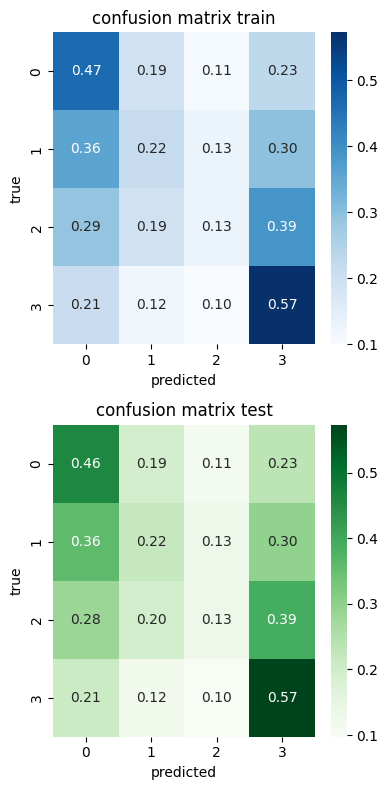

In [34]:
#CONOCER QUE TAN BUENO ES EL MODELO PREDICIENDO LAS CLASES (0,1,2,3) tanto con los datos de entrenamiento como los de prueba
import seaborn as sns
fig, axs = plt.subplots(2, 1, figsize=(4, 8))

for i, ax in enumerate(axs):
    if i == 0: # Heatmap de la matriz de confusión normalizada (la de entrenamiento)
        sns.heatmap(cm_tr, annot=True, ax=ax, fmt=".2f", cmap="Blues")
        ax.set_title("confusion matrix train")
    if i == 1:  # Heatmap de la matriz de confusión normalizada (de prueba)
        sns.heatmap(cm_ts, annot=True, ax=ax, fmt=".2f", cmap="Greens")
        ax.set_title("confusion matrix test")
    ax.set_ylabel("true")
    ax.set_xlabel("predicted")

plt.tight_layout() # Ajuste del layout para evitar solapamiento
plt.show()

**APLICAR MODELO AL TEST** = cargar los datos nuevos y verlos para asegurar que todo está bien antes de pasarlos al modelo

In [35]:
datost = pd.read_csv("test.csv")  # Cargar datos de prueba para predicción
datost # primeras filas del dataset

,ID,PERIODO_ACADEMICO,E_PRGM_ACADEMICO,E_PRGM_DEPARTAMENTO,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_ESTRATOVIVIENDA,F_TIENEINTERNET,F_EDUCACIONPADRE,F_TIENELAVADORA,F_TIENEAUTOMOVIL,E_PRIVADO_LIBERTAD,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR,F_TIENEINTERNET.1,F_EDUCACIONMADRE,INDICADOR_1,INDICADOR_2,INDICADOR_3,INDICADOR_4
0,550236,20183,TRABAJO SOCIAL,BOLIVAR,Menos de 500 mil,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica completa,Si,No,N,Si,Si,Si,Primaria completa,0.328,0.219,0.317,0.247
1,98545,20203,ADMINISTRACION COMERCIAL Y DE MERCADEO,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Técnica o tecnológica completa,0.227,0.283,0.296,0.324
2,499179,20212,INGENIERIA MECATRONICA,BOGOTÁ,Entre 1 millón y menos de 2.5 millones,0,Estrato 3,Si,Secundaria (Bachillerato) incompleta,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.285,0.228,0.294,0.247
3,782980,20195,CONTADURIA PUBLICA,SUCRE,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,Estrato 1,No,Primaria incompleta,Si,No,N,No,No,No,Primaria incompleta,0.160,0.408,0.217,0.294
4,785185,20212,ADMINISTRACION DE EMPRESAS,ATLANTICO,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Estrato 2,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,0.209,0.283,0.306,0.286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296781,496981,20195,ADMINISTRACION DE EMPRESAS,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 1,Si,Primaria incompleta,Si,Si,N,Si,Si,Si,Primaria incompleta,0.168,0.410,0.235,0.300
296782,209415,20183,DERECHO,META,Entre 1 millón y menos de 2.5 millones,0,Estrato 4,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.471,0.184,0.264,0.193
296783,239074,20212,DERECHO,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,Si,Si,Educación profesional completa,0.292,0.249,0.276,0.256
296784,963852,20195,INGENIERIA AERONAUTICA,ANTIOQUIA,Entre 5.5 millones y menos de 7 millones,Entre 11 y 20 horas,Estrato 3,Si,Educación profesional completa,Si,No,N,No,Si,Si,Educación profesional completa,0.305,0.219,0.310,0.260


In [36]:
#Se seleccionan las columnas que fueron utilizadas en el modelo entrenado. También se extrae el `ID` de cada registro para generar el archivo `submission.csv`.

datost_ids = datost['ID'].values

# Seleccionar las mismas variables que se usaron en entrenamiento
datost = datost[['E_VALORMATRICULAUNIVERSIDAD', 'E_HORASSEMANATRABAJA', 'F_TIENEINTERNET', 'E_PAGOMATRICULAPROPIO', 'F_TIENECOMPUTADOR']]
print ("shape of loaded dataframe", datost.shape)
datost.head() # Confirmar tamaño y vista preliminar del conjunto de prueba

shape of loaded dataframe (296786, 5)


,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,F_TIENEINTERNET,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR
0,Menos de 500 mil,Menos de 10 horas,Si,Si,Si
1,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Si,No,Si
2,Entre 1 millón y menos de 2.5 millones,0,Si,No,Si
3,Entre 1 millón y menos de 2.5 millones,Entre 21 y 30 horas,No,No,No
4,Entre 2.5 millones y menos de 4 millones,Entre 11 y 20 horas,Si,No,Si


Preprocesado aplicado a test.csv

In [37]:
#Se aplica el mismo proceso de limpieza y transformación utilizado en el conjunto de entrenamiento

# Revisión de valores nulos por variable
sum(datost.E_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.E_HORASSEMANATRABAJA.isna()), sum(datost.F_TIENEINTERNET.isna()), sum(datost.E_PAGOMATRICULAPROPIO.isna()), sum(datost.F_TIENECOMPUTADOR.isna())

(2723, 13379, 11539, 2807, 16439)

In [38]:
# Reemplazo de los valores nulos con estrategias coherentes al entrenamiento

datost.E_VALORMATRICULAUNIVERSIDAD.values[datost.E_VALORMATRICULAUNIVERSIDAD.isna()] = 'no info'
datost.E_HORASSEMANATRABAJA.values[datost.E_HORASSEMANATRABAJA.isna()] = 'no info'
datost.F_TIENEINTERNET.values[datost.F_TIENEINTERNET.isna()] = 'no info'
datost.E_PAGOMATRICULAPROPIO.values[datost.E_PAGOMATRICULAPROPIO.isna()] = 'no info'
datost.F_TIENECOMPUTADOR.values[datost.F_TIENECOMPUTADOR.isna()] = 'no info'

# Confirmamos que ya no hay nulos
sum(datost.E_VALORMATRICULAUNIVERSIDAD.isna()), sum(datost.E_HORASSEMANATRABAJA.isna()), sum(datost.F_TIENEINTERNET.isna()), sum(datost.E_PAGOMATRICULAPROPIO.isna()), sum(datost.F_TIENECOMPUTADOR.isna())

(0, 0, 0, 0, 0)

In [39]:
# Diccionario de conversión para valor de la matrícula
valormat = {'Entre 1 millón y menos de 2.5 millones': 1.75,
 'Entre 2.5 millones y menos de 4 millones': 3.25,
 'Menos de 500 mil': 0.25,
 'Entre 500 mil y menos de 1 millón': 0.75,
 'Entre 4 millones y menos de 5.5 millones': 4.75,
 'Más de 7 millones': 7.75,
 'Entre 5.5 millones y menos de 7 millones': 6.25,
 'No pagó matrícula': 0,
 'no info': -1}

datost.E_VALORMATRICULAUNIVERSIDAD = np.r_[[valormat[i] for i in datost.E_VALORMATRICULAUNIVERSIDAD]] # transformación a numérico
datost.E_VALORMATRICULAUNIVERSIDAD.value_counts() # Verificamos distribución

/tmp/ipython-input-37238298.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.E_VALORMATRICULAUNIVERSIDAD = np.r_[[valormat[i] for i in datost.E_VALORMATRICULAUNIVERSIDAD]] # transformación a numérico


,count
E_VALORMATRICULAUNIVERSIDAD,
1.75,86923
3.25,55193
0.25,34589
0.75,33564
4.75,29855
7.75,29061
6.25,16558
0.00,8320
-1.00,2723


In [40]:
# Diccionario de codificación para rangos de horas
htra = {'0': 0,
    'Menos de 10 horas': 5,
    'Entre 11 y 20 horas': 15,
    'Entre 21 y 30 horas': 25,
    'Más de 30 horas': 35,
    'no info': -1}

datost.E_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.E_HORASSEMANATRABAJA]] # Aplicar transformación
datost.E_HORASSEMANATRABAJA.value_counts() # Verificar la distribución transformada

/tmp/ipython-input-4008261830.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datost.E_HORASSEMANATRABAJA = np.r_[[htra[i] for i in datost.E_HORASSEMANATRABAJA]] # Aplicar transformación


,count
E_HORASSEMANATRABAJA,
35,106189
0,50422
15,49386
25,39931
5,37479
-1,13379


In [41]:
f = datost.F_TIENEINTERNET.values
F_TIENEINTERNET_vals = sorted(np.unique(f)) # Ordenar las categorías para tener un orden consistente
F_TIENEINTERNET_onehot_vals = {val: np.eye(len(F_TIENEINTERNET_vals))[i] for i,val in enumerate(F_TIENEINTERNET_vals)} # Crear diccionario de codificación one-hot
F_TIENEINTERNET_onehot_vals # Visualizar el diccionario de codificación

{'No': array([1., 0., 0.]),
 'Si': array([0., 1., 0.]),
 'no info': array([0., 0., 1.])}

In [42]:
F_TIENEINTERNET_onehot_enc = np.r_[[F_TIENEINTERNET_onehot_vals[i] for i in f]] # Aplicar codificación one-hot a cada valor en el DataFrame de prueba
F_TIENEINTERNET_onehot_enc # Ver los primeros vectores codificados

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]])

In [43]:
# Convertir la matriz codificada en un nuevo DataFrame con nombres de columnas claros
F_TIENEINTERNET_df = pd.DataFrame(F_TIENEINTERNET_onehot_enc, columns=[f"F_TIENEINTERNET__{v}" for v in F_TIENEINTERNET_onehot_vals])
F_TIENEINTERNET_df # Mostrar el nuevo DataFrame

,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info
0,0.0,1.0,0.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,1.0,0.0,0.0
4,0.0,1.0,0.0
...,...,...,...
296781,0.0,1.0,0.0
296782,0.0,1.0,0.0
296783,0.0,1.0,0.0
296784,0.0,1.0,0.0


In [44]:
datost = pd.concat([F_TIENEINTERNET_df, datost], axis=1).drop('F_TIENEINTERNET', axis=1, errors='ignore') # Integrar las columnas codificadas one-hot de 'F_TIENEINTERNET' al DataFrame de prueba
datost.shape

(296786, 7)

In [45]:
# Diccionario de conversión para E_PAGOMATRICULAPROPIO
# Este diccionario está diseñado para el método .replace(), mapeando cadenas categóricas a valores numéricos o np.nan
map_pagodirecto_replace = {
    '1': 1, '1.0': 1, 'si': 1, 'sí': 1, 'propio': 1,
    '0': 0, '0.0': 0, 'no': 0, 'ajeno': 0,
    'no info': np.nan, 'nan': np.nan, 'ninguno': np.nan, 'no aplica': np.nan
}

# Convierte la columna a minúsculas para que coincida con las claves del diccionario y garantizar la consistencia
datost.loc[:, 'E_PAGOMATRICULAPROPIO'] = datost['E_PAGOMATRICULAPROPIO'].astype(str).str.strip().str.lower()

# Aplica el mapeo de reemplazo para convertir valores categóricos a numéricos, introduciendo np.nan para 'sin información'
datost.loc[:, 'E_PAGOMATRICULAPROPIO'] = datost['E_PAGOMATRICULAPROPIO'].replace(map_pagodirecto_replace).astype(float)

# Rellenar los valores NaN con la moda obtenida de los datos de entrenamiento (moda_final)
# moda_final se calculó previamente como 0,0
datost.loc[:, 'E_PAGOMATRICULAPROPIO'] = datost['E_PAGOMATRICULAPROPIO'].fillna(moda_final)

# Verificamos distribución de los valores transformados
datost.E_PAGOMATRICULAPROPIO.value_counts()

/tmp/ipython-input-829966575.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datost.loc[:, 'E_PAGOMATRICULAPROPIO'] = datost['E_PAGOMATRICULAPROPIO'].replace(map_pagodirecto_replace).astype(float)
/tmp/ipython-input-829966575.py:17: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datost.loc[:, 'E_PAGOMATRICULAPROPIO'] = datost['E_PAGOMATRICULAPROPIO'].fillna(moda_final)


,count
E_PAGOMATRICULAPROPIO,
0.0,166676
1.0,130110


In [46]:
# Limpieza para la variable: F_TIENECOMPUTADOR en el conjunto de prueba, alineando con el preprocesamiento de entrenamiento

# Convertir la columna a string y luego a mayúsculas para estandarizar
datost.loc[:, 'F_TIENECOMPUTADOR'] = datost['F_TIENECOMPUTADOR'].astype(str).str.strip().str.upper()

# Diccionario para reemplazar valores categóricos por numéricos o np.nan
# Esto incluye 'NO INFO' y 'NO APLICA' que se convertirán a np.nan temporalmente
map_computer_replace = {
    'SI': 1, 'SÍ': 1, '1': 1, 'TRUE': 1, 'VERDADERO': 1,
    'NO': 0, '0': 0, 'FALSE': 0, 'FALSO': 0,
    'NO INFO': np.nan, 'NO APLICA': np.nan, 'NAN': np.nan # Manejar también el string 'NAN'
}

datost.loc[:, 'F_TIENECOMPUTADOR'] = datost['F_TIENECOMPUTADOR'].replace(map_computer_replace)

# Convertir la columna a tipo numérico, forzando errores a NaN
datost.loc[:, 'F_TIENECOMPUTADOR'] = pd.to_numeric(datost['F_TIENECOMPUTADOR'], errors='coerce')

# Llenar los valores NaN con la moda obtenida del conjunto de entrenamiento ('moda' = 1.0)
datost.loc[:, 'F_TIENECOMPUTADOR'] = datost['F_TIENECOMPUTADOR'].fillna(moda)

# Verificar la distribución final de los valores y la ausencia de NaNs
print("Conteo final de valores:")
print(datost['F_TIENECOMPUTADOR'].value_counts())
print(f"\nValores faltantes después del ajuste final: {datost['F_TIENECOMPUTADOR'].isna().sum()}")

Conteo final de valores:
F_TIENECOMPUTADOR
1.0    272435
0.0     24351
Name: count, dtype: int64

Valores faltantes después del ajuste final: 0


/tmp/ipython-input-3370809584.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datost.loc[:, 'F_TIENECOMPUTADOR'] = datost['F_TIENECOMPUTADOR'].replace(map_computer_replace)
/tmp/ipython-input-3370809584.py:20: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datost.loc[:, 'F_TIENECOMPUTADOR'] = datost['F_TIENECOMPUTADOR'].fillna(moda)


In [47]:
datost.head() #visualizar

,F_TIENEINTERNET__No,F_TIENEINTERNET__Si,F_TIENEINTERNET__no info,E_VALORMATRICULAUNIVERSIDAD,E_HORASSEMANATRABAJA,E_PAGOMATRICULAPROPIO,F_TIENECOMPUTADOR
0,0.0,1.0,0.0,0.25,5,1.0,1.0
1,0.0,1.0,0.0,3.25,25,0.0,1.0
2,0.0,1.0,0.0,1.75,0,0.0,1.0
3,1.0,0.0,0.0,1.75,25,0.0,0.0
4,0.0,1.0,0.0,3.25,15,0.0,1.0


**CONSTRUCCIÓN MODELO**

In [48]:
X_test_data = datost[sorted(datost.columns)].values
X_test_data.shape

(296786, 7)

In [49]:
# Imputar los valores faltantes en los datos de prueba usando el mismo imputer ajustado en los datos de entrenamiento
X_test_data_imputed = imputer.transform(X_test_data)

# Realizar predicciones con el modelo entrenado sobre los datos de prueba imputados
preds_test_data = lr.predict(X_test_data_imputed)

**Cargar submission a kaggle**

In [50]:
rmapi = {v:k for k,v in rg.items()} # Crear diccionario inverso para convertir predicciones numéricas a etiquetas textuales
text_preds_test_data = [rmapi[i] for i in preds_test_data] # Aplicar el diccionario inverso a las predicciones del modelo para obtener etiquetas originales

In [51]:
# Aqui se crea el DataFrame final de envío con columnas 'ID' y 'RENDIMIENTO_GLOBAL' en formato textual
submission = pd.DataFrame([datost_ids, text_preds_test_data], index = ['ID', 'RENDIMIENTO_GLOBAL']).T
submission

,ID,RENDIMIENTO_GLOBAL
0,550236,bajo
1,98545,alto
2,499179,alto
3,782980,bajo
4,785185,alto
...,...,...
296781,496981,medio-bajo
296782,209415,alto
296783,239074,medio-alto
296784,963852,alto


In [52]:
submission.to_csv("submission.csv", index=False) # Se exporta el archivo en formato csv

In [53]:
!head submission.csv

ID,RENDIMIENTO_GLOBAL
550236,bajo
98545,alto
499179,alto
782980,bajo
785185,alto
58495,bajo
705444,alto
557548,alto
519909,bajo


In [54]:
submission.shape

(296786, 2)

In [55]:
#SOLUCIÓN A KAGGLE.
!kaggle competitions submit -c udea-ai-4-eng-20252-pruebas-saber-pro-colombia -f submission.csv -m "Submit_Keudith"

100% 3.87M/3.87M [00:00<00:00, 6.53MB/s]
Successfully submitted to UDEA/ai4eng 20252 - Pruebas Saber Pro Colombia